In [15]:
import pandas as pd
import numpy as np
import cv2
import os
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
# Configuring Matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
savefig_options = dict(format="png", dpi=300, bbox_inches="tight")

# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [31]:
data_dir = '/home/ahmed/Ahmed_data/dtw_da/data'
features_dir = os.path.join(data_dir, 'features')
gt_dir = os.path.join(data_dir , 'groundTruth')

mapping_file = "/home/ahmed/Ahmed_data/DATASETS/data/DesktopAssembly/mapping/mapping.txt"

In [17]:
src_name = '2020-04-02-150120'
tgt_name = '2020-04-19_13-42-56'

In [18]:
source_features_path = os.path.join(features_dir, src_name+'.npy')
tgt_features_path = os.path.join(features_dir, tgt_name+'.npy')

In [19]:
src_feat= np.load(source_features_path)
tgt_feat = np.load(tgt_features_path)

In [20]:
src_gt_path = os.path.join(gt_dir, src_name)
tgt_gt_path = os.path.join(gt_dir, tgt_name)

In [21]:
tgt_feat.shape

(858, 1024)

In [22]:

#src_cluster_path ='/home/ahmed/Ahmed_data/agglomerative/clusters/clusters'

In [23]:
#src_feat = np.repeat(src_feat, 3, axis=0)
#tgt_feat = np.repeat(tgt_feat, 3, axis=0)

In [24]:


def distance(x, y):
    # Replace this function with your preferred distance metric for video frames
    # You can use methods like Euclidean distance, cosine similarity, or other suitable metrics.
    return np.linalg.norm(x - y)

def dtw_distance_matrix(frames1, frames2):
    n, m = len(frames1), len(frames2)
    distance_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            distance_matrix[i, j] = distance(frames1[i], frames2[j])

    return distance_matrix

def dtw_alignment(frames1, frames2):
    n, m = len(frames1), len(frames2)
    dtw_matrix = np.zeros((n, m))
    distance_matrix = dtw_distance_matrix(frames1, frames2)

    # Initialize the first row and column of the DTW matrix
    dtw_matrix[0, 0] = distance_matrix[0, 0]
    for i in range(1, n):
        dtw_matrix[i, 0] = float('inf')
    for j in range(1, m):
        dtw_matrix[0, j] = dtw_matrix[0, j - 1] + distance_matrix[0, j]

    # Fill the rest of the DTW matrix
    for i in range(1, n):
        for j in range(1, m):
            cost = distance_matrix[i, j]
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])

    # Backtrack to find the optimal alignment path
    alignment_path = []
    i, j = n - 1, m - 1
    while i > 0 or j > 0:
        alignment_path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_neighbor = min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
            if min_neighbor == dtw_matrix[i - 1, j]:
                i -= 1
            elif min_neighbor == dtw_matrix[i, j - 1]:
                j -= 1
            else:
                i -= 1
                j -= 1

    alignment_path.append((0, 0))
    alignment_path.reverse()

    return alignment_path

# Example usage:
# Replace `frames1` and `frames2` with your actual video frame feature vectors
#frames1 = np.random.rand(100, 128)  # Random feature vectors for the first video
#frames2 = np.random.rand(150, 128)  # Random feature vectors for the second video

alignment_path = dtw_alignment(src_feat, tgt_feat)
print("Alignment path:", alignment_path)


Alignment path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18), (20, 19), (21, 20), (22, 21), (23, 22), (24, 23), (25, 24), (26, 25), (27, 26), (28, 27), (29, 28), (30, 29), (31, 30), (32, 31), (33, 32), (34, 33), (35, 34), (36, 35), (37, 36), (38, 37), (39, 38), (40, 39), (41, 40), (42, 41), (43, 42), (44, 43), (45, 44), (46, 45), (47, 46), (48, 47), (49, 48), (50, 49), (51, 50), (52, 51), (53, 52), (54, 53), (55, 54), (56, 55), (57, 56), (58, 57), (59, 58), (60, 59), (61, 60), (62, 61), (63, 62), (64, 63), (65, 64), (66, 65), (67, 66), (68, 67), (69, 68), (70, 69), (71, 70), (72, 71), (73, 72), (74, 73), (75, 74), (76, 75), (77, 76), (78, 77), (79, 78), (80, 79), (81, 80), (82, 81), (83, 82), (84, 83), (85, 84), (86, 85), (87, 86), (88, 87), (89, 88), (90, 89), (91, 90), (92, 91), (93, 92), (94, 93), (95, 94), (96, 95), (97, 96), (98, 97), (99, 98), (10

In [26]:
def distance(x, y):
    # Replace this function with your preferred distance metric for video frames
    # You can use methods like Euclidean distance, cosine similarity, or other suitable metrics.
    return np.linalg.norm(x - y)

def dtw_distance_matrix(frames1, frames2):
    n, m = len(frames1), len(frames2)
    distance_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            distance_matrix[i, j] = distance(frames1[i], frames2[j])

    return distance_matrix

In [27]:
distance_matrix = dtw_distance_matrix(src_feat, tgt_feat)

In [28]:
distance_matrix.shape

(917, 858)

In [29]:

def load_ground_truth(file_path):
    with open(file_path, 'r') as file:
        ground_truth = [line.strip() for line in file.readlines()]
    return ground_truth
def extract_action_segments(ground_truth):
    segments = {}
    start = None
    current_class = None
    for i, label in enumerate(ground_truth):
        if label != current_class:
            if start is not None:
                segments[current_class].append((start, i-1))
            current_class = label
            start = i
            if current_class not in segments:
                segments[current_class] = []
    if start is not None:
        segments[current_class].append((start, len(ground_truth)-1))
    return segments

In [30]:
def read_clip_indices_from_txt(file_path):
    clip_indices = {}
    with open(file_path, 'r') as file:
        for line in file:
            clip_name, indices = line.strip().split(':')
            start_idx, end_idx = map(int, indices.split(','))
            clip_indices[int(clip_name)] = (start_idx, end_idx)
    return clip_indices

In [32]:
src_gt = load_ground_truth(src_gt_path)

# reading and mapping the names (action names) and classes (action ids)
file_ptr = open(mapping_file, 'r')
actions = file_ptr.read().split('\n')[:-1]
file_ptr.close()
actions_dict = dict()
# actions_dict
for a in actions:
    actions_dict[a.split()[1]] = int(a.split()[0])

classes = np.zeros(min(src_feat.shape[0], len(src_gt)),dtype=np.float32)
for i in range(len(classes)):
    classes[i] = actions_dict[src_gt[i]] #content[i]
src_indices= extract_action_segments(classes)

In [34]:
src_indices

{22.0: [(0, 6), (904, 916)],
 0.0: [(7, 22)],
 1.0: [(23, 61)],
 2.0: [(62, 71)],
 3.0: [(72, 88)],
 4.0: [(89, 187)],
 5.0: [(188, 213)],
 6.0: [(214, 232)],
 7.0: [(233, 277)],
 8.0: [(278, 345)],
 9.0: [(346, 389)],
 10.0: [(390, 427)],
 11.0: [(428, 465)],
 12.0: [(466, 484)],
 13.0: [(485, 532)],
 14.0: [(533, 552)],
 15.0: [(553, 670)],
 16.0: [(671, 686)],
 17.0: [(687, 739)],
 18.0: [(740, 778)],
 19.0: [(779, 827)],
 20.0: [(828, 842)],
 21.0: [(843, 903)]}

In [37]:
src_indices= {22.0: (904, 916),
 0.0: (0, 22),
 1.0: (23, 61),
 2.0: (62, 71),
 3.0: (72, 88),
 4.0: (89, 187),
 5.0: (188, 213),
 6.0: (214, 232),
 7.0: (233, 277),
 8.0: (278, 345),
 9.0: (346, 389),
 10.0: (390, 427),
 11.0: (428, 465),
 12.0: (466, 484),
 13.0: (485, 532),
 14.0: (533, 552),
 15.0: (553, 670),
 16.0: (671, 686),
 17.0: (687, 739),
 18.0: (740, 778),
 19.0: (779, 827),
 20.0: (828, 842),
 21.0: (843, 903)}

In [38]:

# Find the maximum end index in the original_dict
max_end_index = max(end_idx for _, (_, end_idx) in src_indices.items())

# Create a list with the length of max_end_index + 1 and initialize with zeros
result_list = [0] * (max_end_index + 1)

# Iterate through the original_dict and fill the result_list
for key, (start_idx, end_idx) in src_indices.items():
    result_list[start_idx:end_idx + 1] = [key] * (end_idx - start_idx + 1)

print(len(result_list))

917


In [62]:
alignment_path[-1]

(1872, 2196)

In [39]:
target_segments = []

In [40]:
for indexes in alignment_path:
    target_segments.append(result_list[indexes[0]])

In [41]:
tgt_num_frames = alignment_path[-1][1]+1

In [42]:
tgt_num_frames

858

In [43]:
target_labels = [-1 for _ in range(tgt_num_frames)]

In [44]:
for indexes in alignment_path:
    print(indexes[1])
    target_labels[indexes[1]]=result_list[indexes[0]]

0
1
2
3
4
5
6
7
8
9
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
213
213
214
215
216
217
218
219
219
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272

In [45]:
len(target_labels)

858

In [46]:
tgt_indices = {}

# Iterate through the result_list and group consecutive elements with the same value
key = None
start_idx = None
for idx, value in enumerate(target_segments):
    if value != key:
        if key is not None:
            tgt_indices[key] = (start_idx, idx -1 )
        key = value
        start_idx = idx

# Add the last group to the converted_dict
if key is not None:
    tgt_indices[key] = (start_idx, len(target_segments))

print(tgt_indices)

{0.0: (0, 22), 1.0: (23, 61), 2.0: (62, 71), 3.0: (72, 88), 4.0: (89, 187), 5.0: (188, 213), 6.0: (214, 232), 7.0: (233, 277), 8.0: (278, 345), 9.0: (346, 389), 10.0: (390, 427), 11.0: (428, 465), 12.0: (466, 484), 13.0: (485, 532), 14.0: (533, 552), 15.0: (553, 670), 16.0: (671, 686), 17.0: (687, 739), 18.0: (740, 778), 19.0: (779, 827), 20.0: (828, 842), 21.0: (843, 903), 22.0: (904, 917)}


In [47]:
tgt_indices = {}

# Iterate through the result_list and group consecutive elements with the same value
key = None
start_idx = None
for idx, value in enumerate(target_labels):
    if value != key:
        if key is not None:
            tgt_indices[key] = (start_idx, idx -1 )
        key = value
        start_idx = idx

# Add the last group to the converted_dict
if key is not None:
    tgt_indices[key] = (start_idx, len(target_labels))

print(tgt_indices)

{0.0: (0, 21), 1.0: (22, 60), 2.0: (61, 70), 3.0: (71, 87), 4.0: (88, 186), 5.0: (187, 212), 6.0: (213, 227), 7.0: (228, 272), 8.0: (273, 340), 9.0: (341, 384), 10.0: (385, 422), 11.0: (423, 460), 12.0: (461, 479), 13.0: (480, 527), 14.0: (528, 543), 15.0: (544, 628), 16.0: (629, 644), 17.0: (645, 697), 18.0: (698, 736), 19.0: (737, 777), 20.0: (778, 788), 21.0: (789, 844), 22.0: (845, 858)}


In [48]:
colors=  []
for v, (s, e) in src_indices.items():
    for i in range(s, e+1):
        colors.append(v)

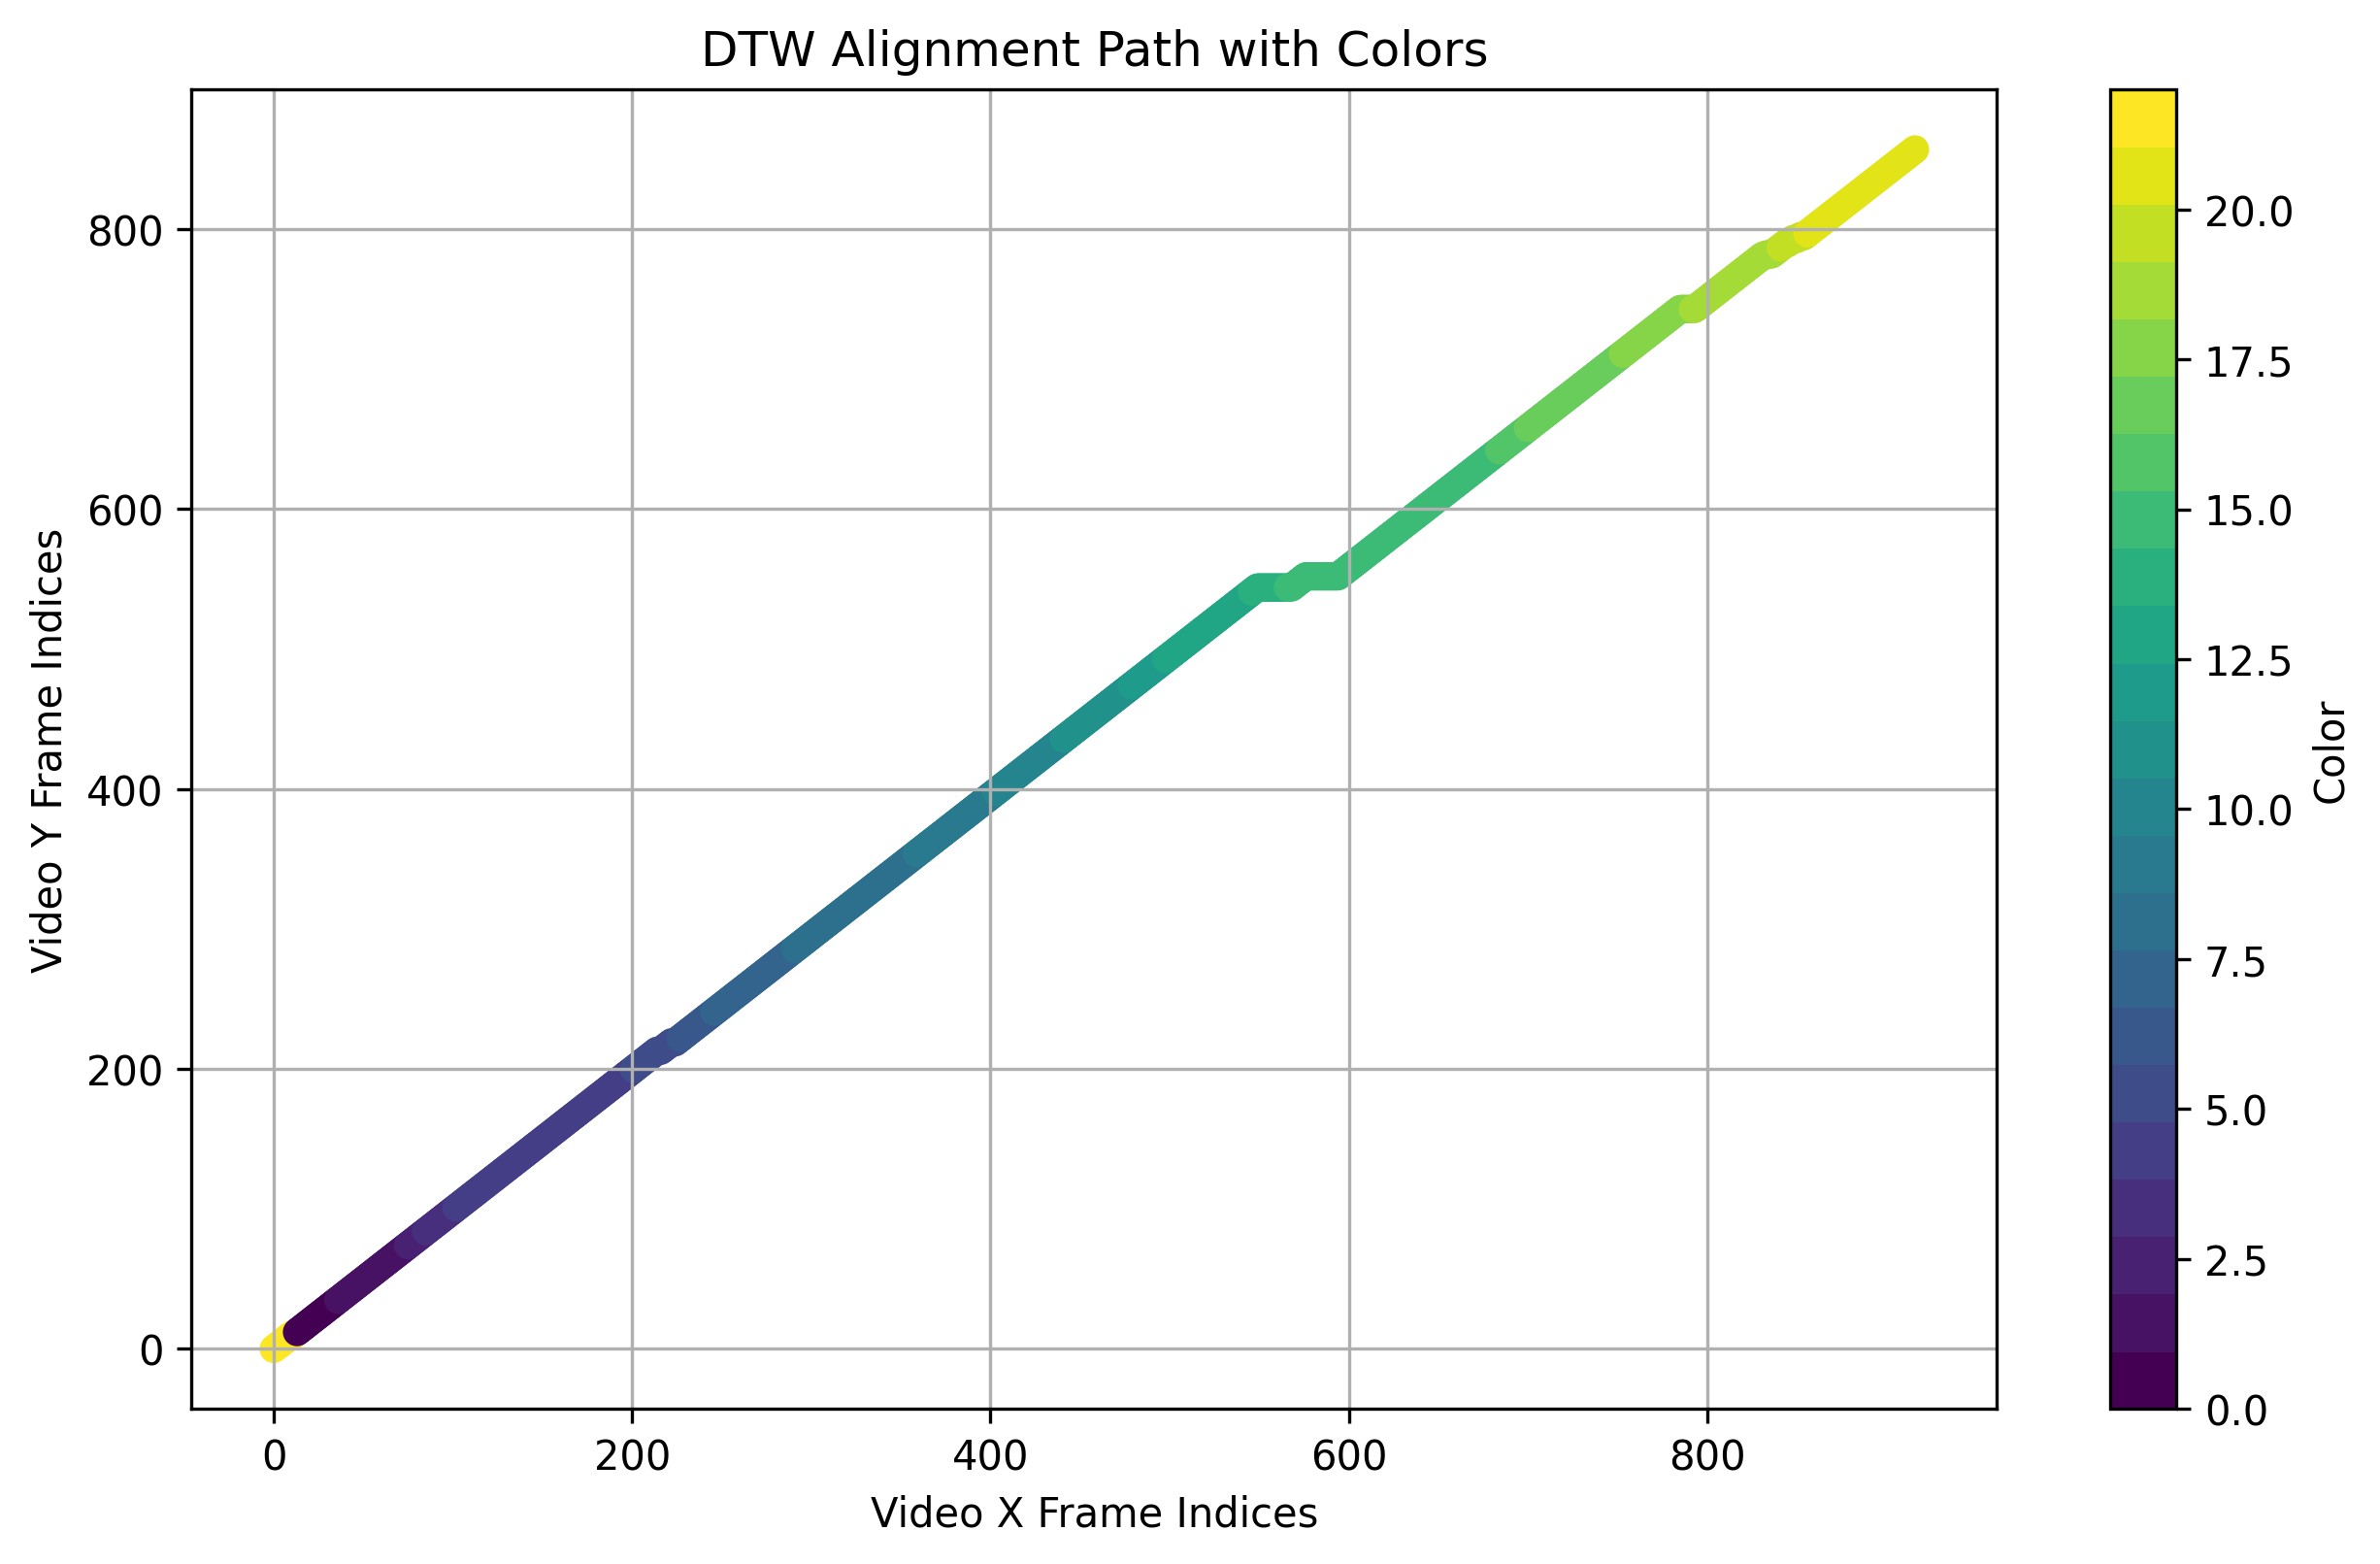

In [49]:
import matplotlib.pyplot as plt

# Create a visualization of the alignment path

#colors = np.random.randint(1, 6, size=len(src_feat))  # Random colors (1 to 5) for the alignment path

# Separate x_indices and y_indices from the alignment path
x_indices = [i for i, _ in alignment_path]
y_indices = [j for _, j in alignment_path]
path_colors = [colors[i] for i in x_indices]

# Create a colormap using ListedColormap
num_unique_colors = len(np.unique(colors))
cmap = plt.get_cmap('viridis', num_unique_colors)

# Create a visualization of the alignment path with colors
plt.figure(figsize=(10, 6))
plt.scatter(x_indices, y_indices, c=path_colors, cmap=cmap, marker='o', vmin=np.min(colors), vmax=np.max(colors))
plt.xlabel('Video X Frame Indices')
plt.ylabel('Video Y Frame Indices')
plt.title('DTW Alignment Path with Colors')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()




In [62]:
src_avg_feature_vectors = []
for k, (start_idx , end_idx) in src_indices.items():
    avg_vector= np.mean(src_feat[start_idx:end_idx], axis= 0)
    print(avg_vector.shape)
    # normalizing feature vectors 
    #magnitude = np.linalg.norm(avg_vector)

    # Normalize the vector
    #normalized_vector = avg_vector / magnitude
    src_avg_feature_vectors.append(avg_vector)
Note that for this stage you need to specify the pretrained model from the first stag

(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)


In [63]:
tgt_avg_feature_vectors = []
for k, (start_idx , end_idx) in tgt_indices.items():
    avg_vector= np.mean(tgt_feat[start_idx:end_idx], axis= 0)
    print(avg_vector.shape)
    # normalizing feature vectors 
    #magnitude = np.linalg.norm(avg_vector)

    # Normalize the vector
    #normalized_vector = avg_vector / magnitude
    tgt_avg_feature_vectors.append(avg_vector)

(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)
(1024,)


In [68]:
from scipy.spatial import distance

In [69]:
len(tgt_avg_feature_vectors)

23

In [84]:
distances = distance.cdist(np.array(src_avg_feature_vectors), src_avg_feature_vectors)

In [85]:
import seaborn as sns

In [86]:
distances[4]

array([0.08861232, 0.15075778, 0.25804361, 0.10092546, 0.        ,
       0.36310362, 0.21113769, 0.15075778, 0.28250994, 0.37135692,
       0.22970062, 0.23604337, 0.25005838, 0.21113769, 0.23439181,
       0.        , 0.36475496, 0.11150912, 0.37264643, 0.25005838,
       0.22970062, 0.11150912, 0.37264643])

<AxesSubplot:>

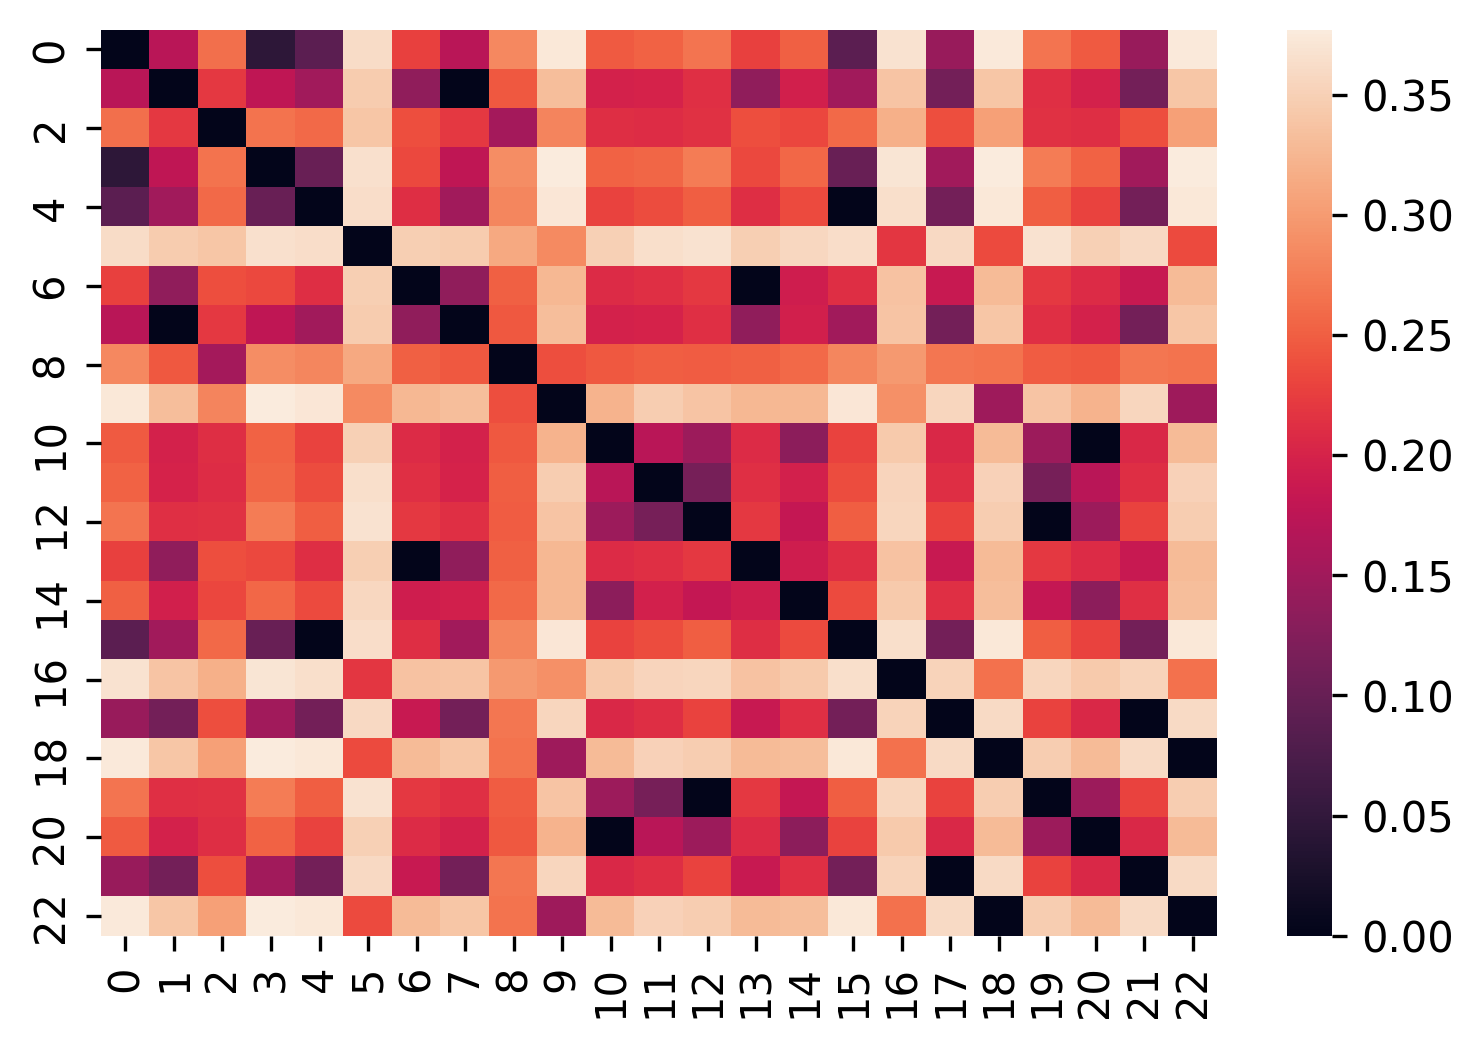

In [87]:
sns.heatmap(distances)

In [74]:
# Calculate the Euclidean norms for each row
row_norms = np.linalg.norm(distances, axis=1, keepdims=True)

# Perform row normalization
normalized_data = distances / row_norms


<AxesSubplot:>

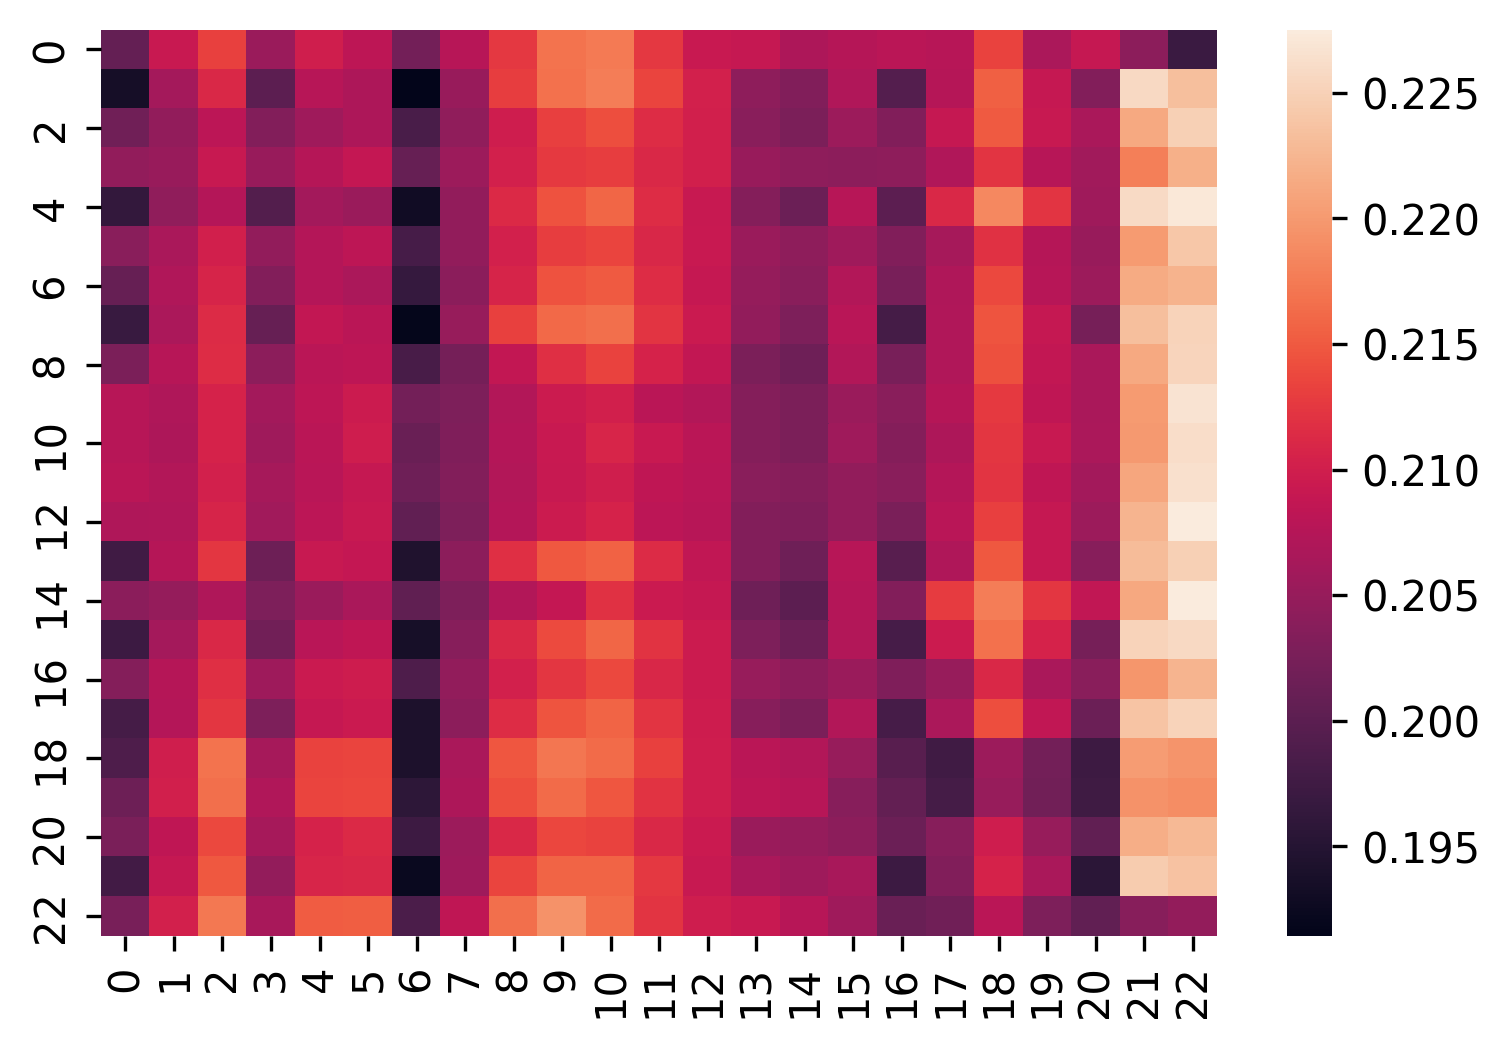

In [75]:
sns.heatmap(normalized_data)

In [76]:
from sklearn.metrics.pairwise import cosine_similarity


In [77]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

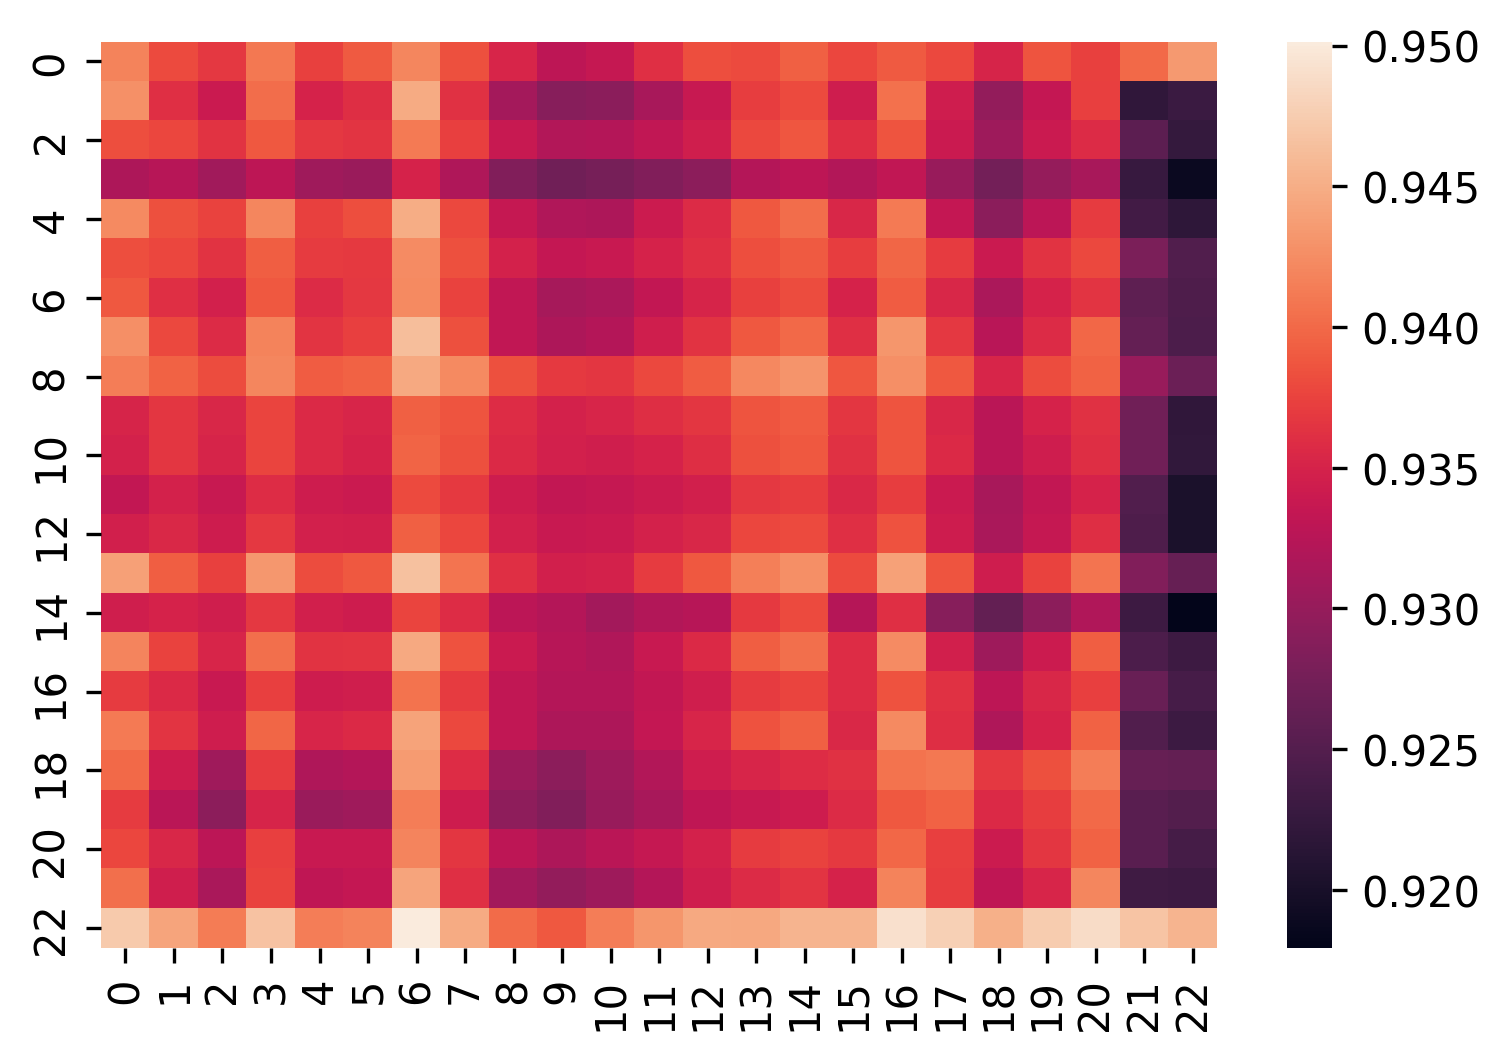

In [78]:
sns.heatmap(similarity_matrix)

In [88]:
src_avg_feature_vectors = []
for k, (start_idx , end_idx) in src_indices.items():
    ssd_values = np.sum((src_feat[start_idx:end_idx, np.newaxis, :] - src_feat[np.newaxis, start_idx:end_idx, :])**2, axis=2)
    representative_frame_index = np.argmin(np.sum(ssd_values, axis=1))
    representative_frame = src_feat[representative_frame_index]
    src_avg_feature_vectors.append(representative_frame)

In [89]:
tgt_avg_feature_vectors = []
for k, (start_idx , end_idx) in tgt_indices.items():
    ssd_values = np.sum((tgt_feat[start_idx:end_idx, np.newaxis, :] - tgt_feat[np.newaxis, start_idx:end_idx, :])**2, axis=2)
    representative_frame_index = np.argmin(np.sum(ssd_values, axis=1))
    representative_frame = tgt_feat[representative_frame_index]
    tgt_avg_feature_vectors.append(representative_frame)

In [90]:
tgt_avg_feature_vectors

[array([0.10464218, 0.00746721, 0.03598985, ..., 0.04339764, 0.03586223,
        0.03328596], dtype=float32),
 array([0.11484967, 0.00773882, 0.03190466, ..., 0.04319275, 0.04040613,
        0.03232366], dtype=float32),
 array([0.10434395, 0.0138405 , 0.0432015 , ..., 0.03956101, 0.03403682,
        0.02393691], dtype=float32),
 array([0.10104327, 0.01029842, 0.04353518, ..., 0.03979074, 0.04038491,
        0.02460128], dtype=float32),
 array([0.10834223, 0.00779171, 0.03447126, ..., 0.0448144 , 0.04263897,
        0.04330276], dtype=float32),
 array([0.10550547, 0.00580749, 0.03744424, ..., 0.03531804, 0.03176515,
        0.03155598], dtype=float32),
 array([0.1017424 , 0.01125083, 0.0404467 , ..., 0.04221219, 0.03181005,
        0.03018152], dtype=float32),
 array([0.11294494, 0.0446068 , 0.03711505, ..., 0.04808071, 0.03168552,
        0.03368918], dtype=float32),
 array([0.09945025, 0.01302613, 0.04403693, ..., 0.03701546, 0.03812986,
        0.03099597], dtype=float32),
 array([0.

In [91]:
distances = distance.cdist(np.array(src_avg_feature_vectors), tgt_avg_feature_vectors)

<AxesSubplot:>

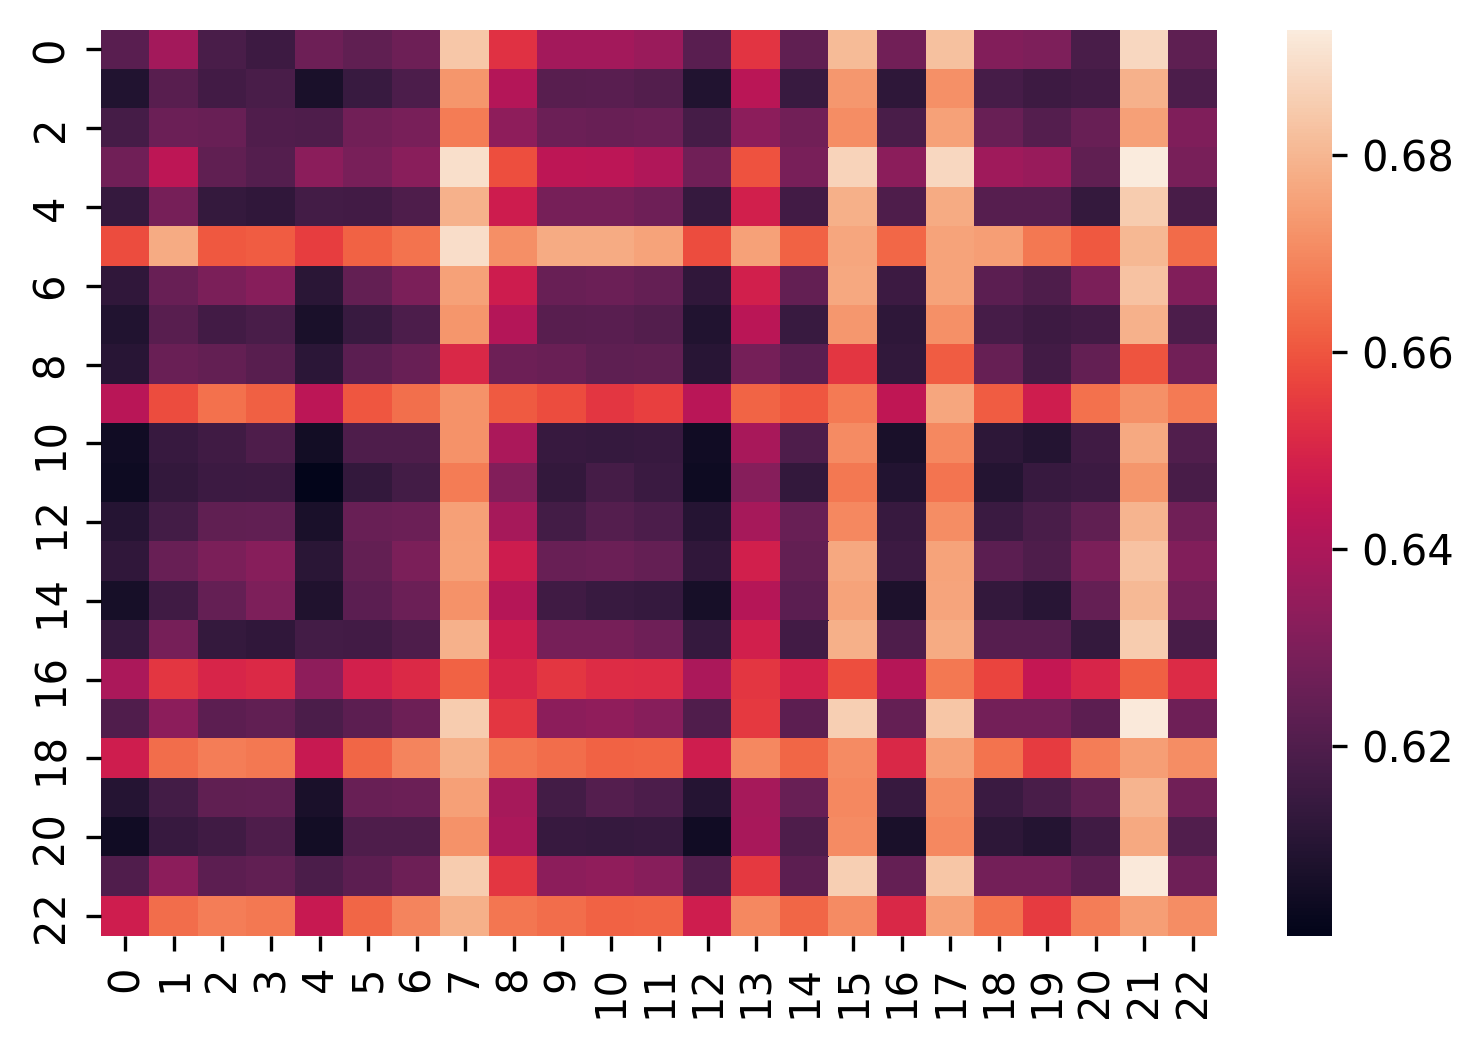

In [92]:
sns.heatmap(distances)

In [93]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

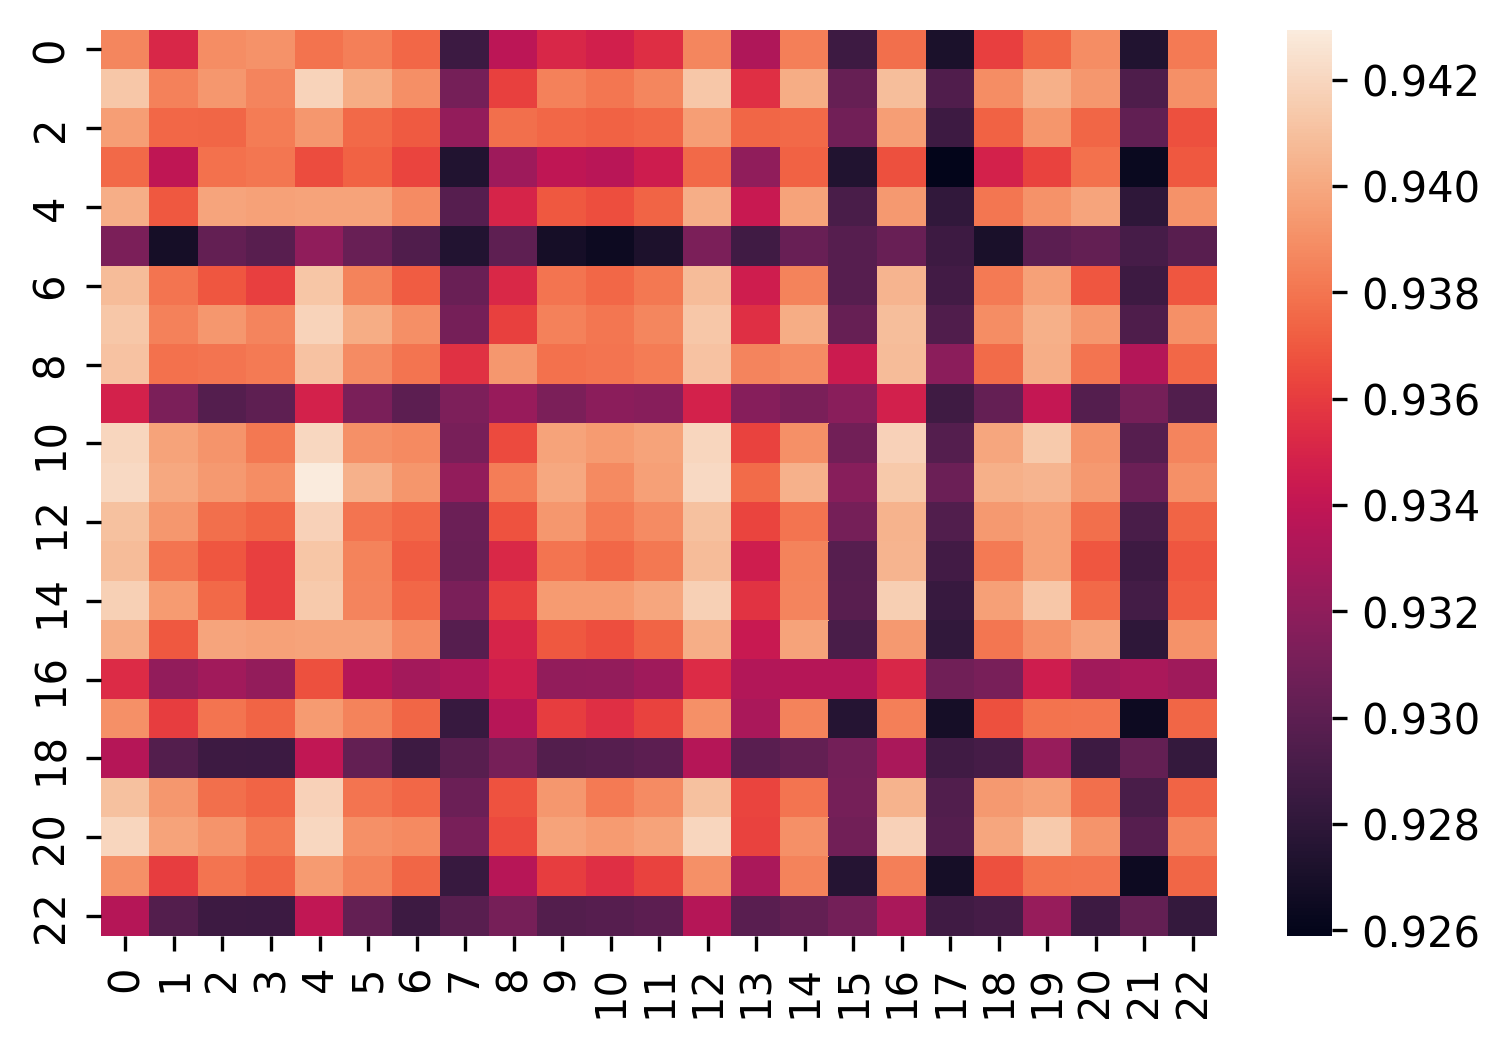

In [94]:
sns.heatmap(similarity_matrix)

In [95]:
from sklearn.cluster import KMeans


In [96]:
num_clusters = 1

In [97]:
src_avg_feature_vectors = []
for k, (start_idx , end_idx) in src_indices.items():
    print(start_idx, end_idx)
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(src_feat[start_idx:end_idx])
    representative_frames = kmeans.cluster_centers_
    print(representative_frames)
    src_avg_feature_vectors.append(representative_frames[0])

904 916
[[0.1272151  0.00315831 0.01432644 ... 0.02831891 0.05087468 0.04469517]]
0 22
[[0.13980682 0.00287386 0.01088955 ... 0.01485752 0.04897241 0.05567993]]
23 61
[[0.14515921 0.00494734 0.00780851 ... 0.01935165 0.05157522 0.0361299 ]]
62 71
[[0.15245391 0.0063687  0.0078337  ... 0.02331562 0.052586   0.03142058]]
72 88
[[0.12909535 0.00310119 0.01009186 ... 0.01458929 0.05566497 0.04437084]]
89 187
[[0.1457987  0.00480202 0.00880094 ... 0.02835834 0.05048447 0.03851228]]
188 213
[[0.13550344 0.00337159 0.00958204 ... 0.02458536 0.05428875 0.04047191]]
214 232
[[0.12493516 0.0021727  0.01192066 ... 0.0172201  0.04954569 0.04807055]]
233 277
[[0.13388422 0.00297768 0.00960025 ... 0.03154064 0.05345988 0.03971824]]
278 345
[[0.13429682 0.00461152 0.00726684 ... 0.02637994 0.05256096 0.03566936]]
346 389
[[0.14389476 0.00446555 0.00638752 ... 0.03463103 0.0615786  0.03345596]]
390 427
[[0.13945743 0.00231625 0.0081237  ... 0.027157   0.05637261 0.03456631]]
428 465
[[0.13253704 0.001

In [98]:
tgt_avg_feature_vectors = []
for k, (start_idx , end_idx) in tgt_indices.items():
    
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tgt_feat[start_idx:end_idx])
    representative_frames = kmeans.cluster_centers_
    tgt_avg_feature_vectors.append(representative_frames[0])

In [99]:
distances = distance.cdist(np.array(src_avg_feature_vectors), np.array(tgt_avg_feature_vectors))

<AxesSubplot:>

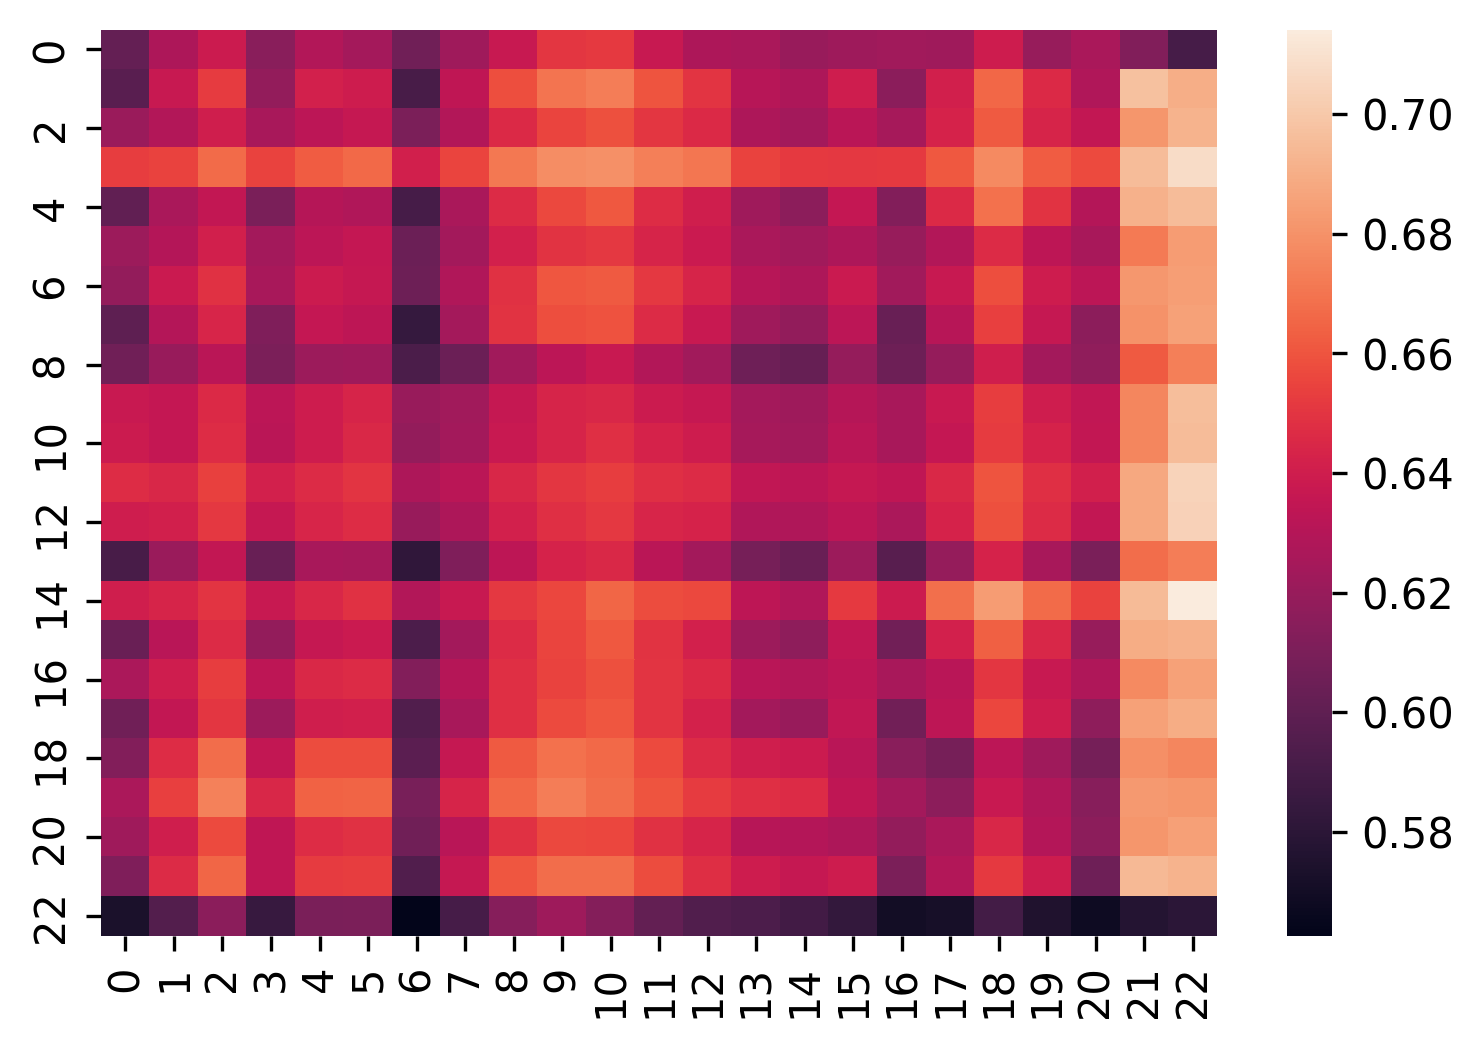

In [100]:
sns.heatmap(distances)

In [101]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

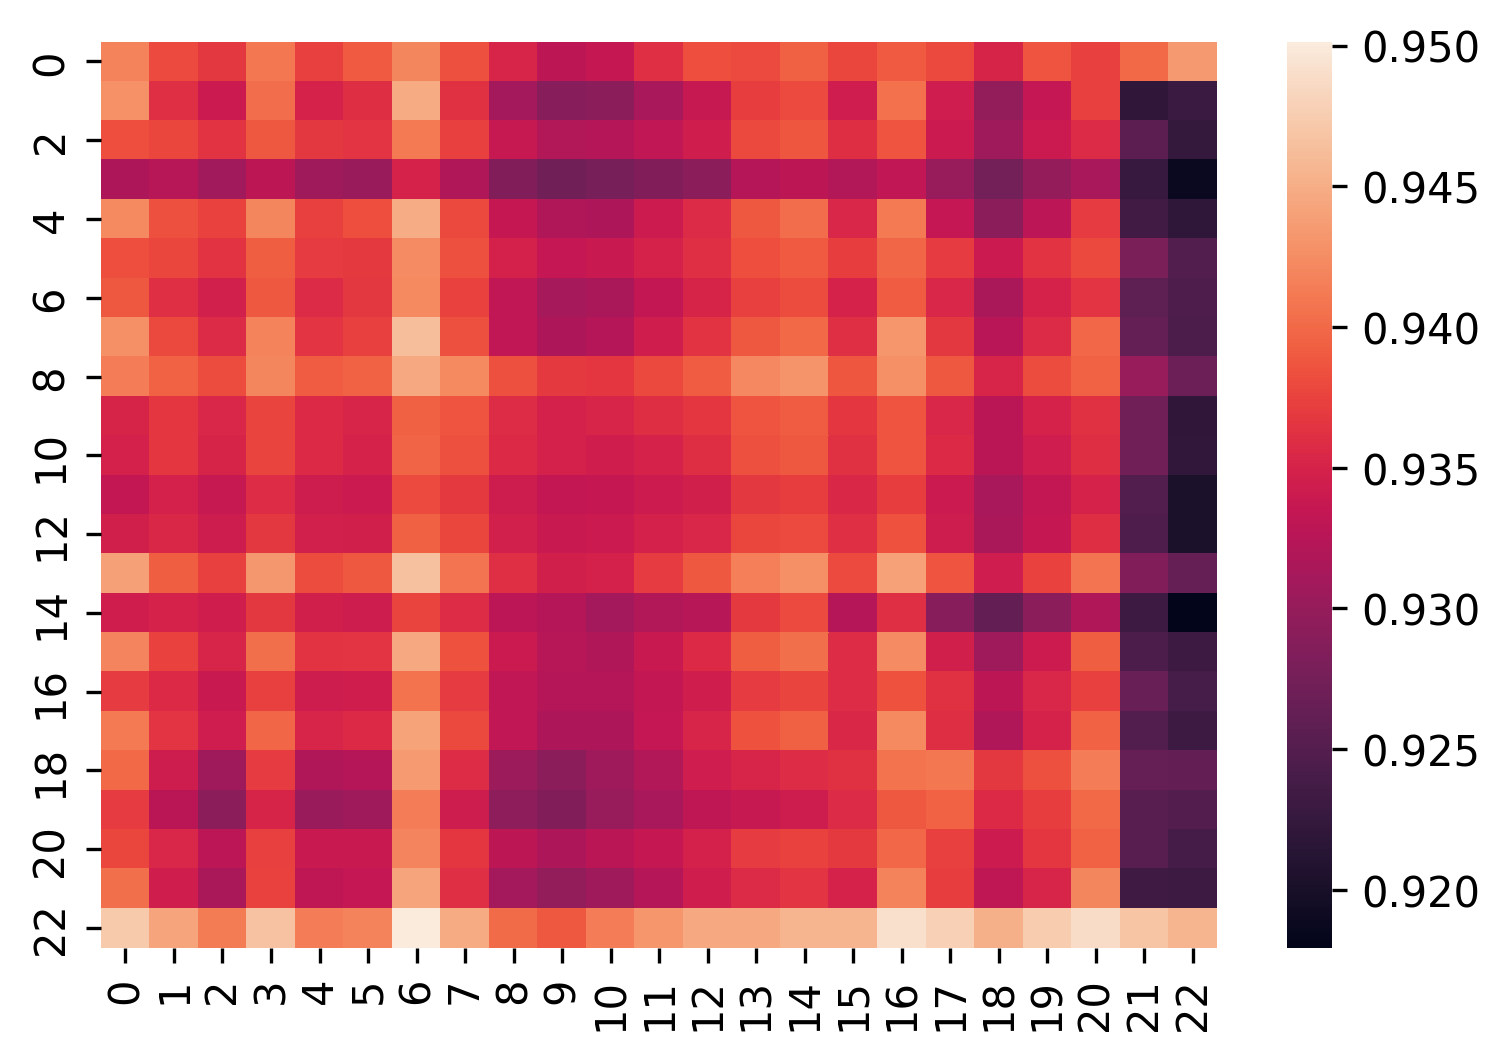

In [102]:
sns.heatmap(similarity_matrix)

In [201]:
ci = []
for k , (start_idx, end_idx) in src_indices.items():
    indexes= alignment_path[start_idx: end_idx]
    errors= 0
    for s, t in indexes:
        errors+=distance_matrix[s,e]
    norm_errors=errors/(end_idx-start_idx)
    ci.append(norm_errors)

In [202]:
ci

[0.6607176642264089,
 0.6569732627490672,
 0.654471400091725,
 0.657543626938077,
 0.6248611176013946,
 0.6344383432801846,
 0.5725377721664233,
 0.5732611630060901,
 0.5689292147264375,
 0.5966477394104004,
 0.5929832779802382,
 0.6403447931463068,
 0.6972216335327729,
 0.6212637708945707,
 0.3809592580353772,
 0.38370197689211044,
 0.37764035993152195]

0.5725377721664233